## Required Software & Packages
Install python

Update pip by running the following command:  
`py -m pip install --upgrade pip`

Install required packages by running the following commands:  
`pip3 install pandas`  
`pip3 install numpy`  
`python -m pip install -U matplotlib`  
`pip install seaborn`


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Prepare data file for use in Python

 - Save .xlsx file into .csv format
 - Open .csv file as a text document using Windows Notepad
 - Remove any spaces between the commas separating the column headers

In [3]:
# Import data from loocal storage (Ensure jupyter notebook and data file in the same directory)
df = pd.read_csv('Momentum JSON Conversions.csv')

# Displays first 5 rows
df.head()

,Date,AAPL,FB,GOOGL,MSFT,PG,SBUX
0,1/2/2016,100000.0,100000.00,100000.00,100000.00,100000.00,100000.00
1,1/3/2016,100000.0,100000.00,100000.00,100000.00,100000.00,100000.00
2,1/4/2016,100000.0,100000.00,100000.00,100000.00,100000.00,100000.00
3,1/5/2016,100000.0,97669.92,97622.04,98768.21,98686.78,97050.94
4,1/6/2016,100000.0,98155.95,97889.56,99217.43,99000.67,97698.69


In [4]:
# Setting the Date column as the Index column (Set Date to the first column)
# This is requred in order to allow Python to process the table data properly 
df = df.set_index(pd.to_datetime(df['Date']))
df = df.drop('Date', axis=1)

df.head()

,AAPL,FB,GOOGL,MSFT,PG,SBUX
Date,,,,,,
2016-01-02,100000.0,100000.00,100000.00,100000.00,100000.00,100000.00
2016-01-03,100000.0,100000.00,100000.00,100000.00,100000.00,100000.00
2016-01-04,100000.0,100000.00,100000.00,100000.00,100000.00,100000.00
2016-01-05,100000.0,97669.92,97622.04,98768.21,98686.78,97050.94
2016-01-06,100000.0,98155.95,97889.56,99217.43,99000.67,97698.69


## **Plotting a simple graph for portfolio value over time**

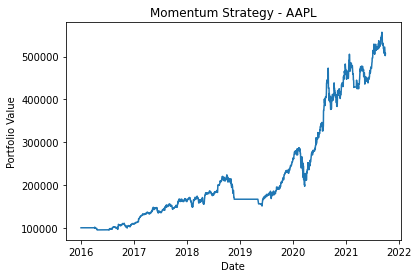

In [5]:
plt.plot(df['AAPL'])
plt.title('Momentum Strategy - AAPL')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.show()

## **Co-variance Matrix of Assets**

In [6]:
#Co-variance matrix
# Log of percentage change
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()

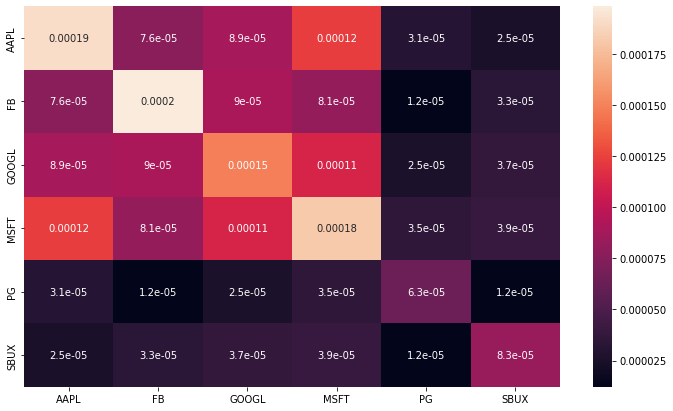

In [7]:
plt.figure(figsize=(12,7))
cov_matrix_plot = sns.heatmap(cov_matrix, annot=True)

## **Correlation Matrix of Assets**

In [8]:
#Correlation matrix
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()

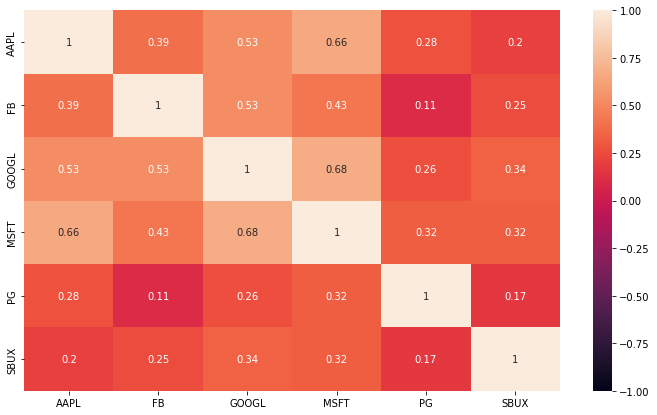

In [9]:
plt.figure(figsize=(12,7))
corr_matrix_plot = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True)

## **Annual Returns**

In [10]:
# Yearly returns for individual assets
ind_er = df.resample('Y').last().pct_change().mean() #for more than 1 year
ind_er

AAPL     0.394322
FB       0.190584
GOOGL    0.239043
MSFT     0.338983
PG       0.076113
SBUX     0.128095
dtype: float64

## **Volatility (Standard Deviation)**

In [11]:
# Converting daily standard deviation to annual standard deviation
# Volatility is given by the annual standard deviation. We multiply by 252 because there are 252 trading days/year.
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(252))
ann_sd

AAPL     0.219800
FB       0.223591
GOOGL    0.193485
MSFT     0.214279
PG       0.126125
SBUX     0.144379
dtype: float64

## **Comparison of Returns & Volatility of Assets/Strategies**

In [12]:
# Creating a table for visualising returns and volatility of assets/strategies
assets = pd.concat([ind_er, ann_sd], axis=1) 
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
AAPL,0.394322,0.219800
FB,0.190584,0.223591
GOOGL,0.239043,0.193485
MSFT,0.338983,0.214279
PG,0.076113,0.126125
SBUX,0.128095,0.144379


## **Modern Portfolio Theory - Efficient Frontier**

In [13]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset/strategy weights

num_assets = len(df.columns)
num_portfolios = 100000 #number of portfolios to plot

In [14]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its weights 
    p_ret.append(returns)
    
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(252) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [15]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [16]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the number of portfolios(num_portfolios) created

,Returns,Volatility,AAPL weight,FB weight,GOOGL weight,MSFT weight,PG weight,SBUX weight
0,0.248996,0.148080,0.259822,0.296279,0.109497,0.137845,0.153953,0.042604
1,0.260888,0.152774,0.165181,0.098925,0.307502,0.258809,0.116595,0.052987
2,0.265457,0.146710,0.261007,0.170027,0.088850,0.237786,0.052977,0.189354
3,0.206202,0.126651,0.090084,0.072525,0.232601,0.191086,0.317649,0.096056
4,0.219110,0.145541,0.057477,0.268913,0.292346,0.170051,0.180603,0.030610


In [17]:
# Export the data table above into a CSV file
portfolios  = pd.DataFrame(data)
portfolios.to_csv('Efficient Frontier Export.csv', index=False)

Text(0, 0.5, 'Returns')

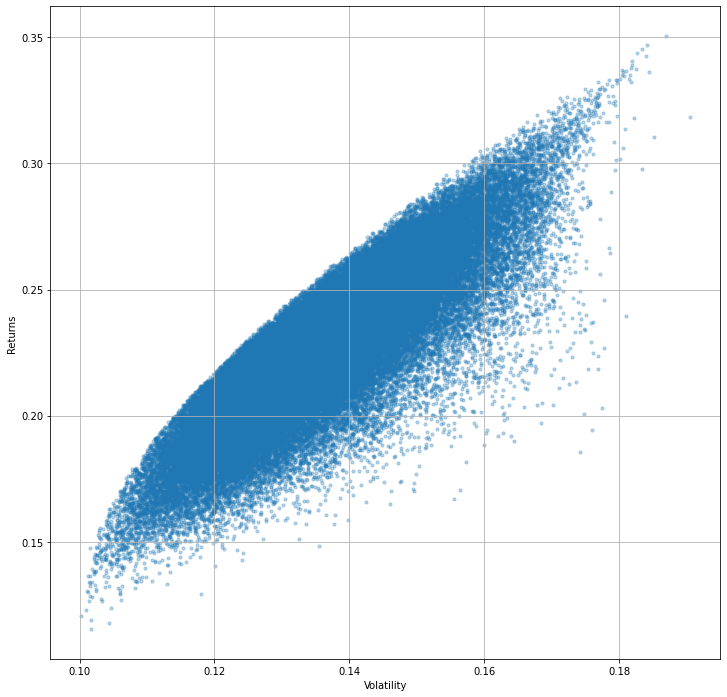

In [18]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[12,12])
plt.xlabel('Volatility')
plt.ylabel('Returns')

## **Getting Weights for Lowest Volatility**

In [19]:
#Getting parameter/weights of the point with minimum volatility
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns         0.120720
Volatility      0.100187
AAPL weight     0.020163
FB weight       0.059536
GOOGL weight    0.037389
MSFT weight     0.020250
PG weight       0.478668
SBUX weight     0.383994
Name: 48430, dtype: float64

In [20]:
assets

,Returns,Volatility
AAPL,0.394322,0.219800
FB,0.190584,0.223591
GOOGL,0.239043,0.193485
MSFT,0.338983,0.214279
PG,0.076113,0.126125
SBUX,0.128095,0.144379


In [21]:
#Sharpe Ratio of minimally volatile portfolio
sharpe_ratio_min_vol = min_vol_port[0] / min_vol_port[1]
sharpe_ratio_min_vol

1.2049419309347367

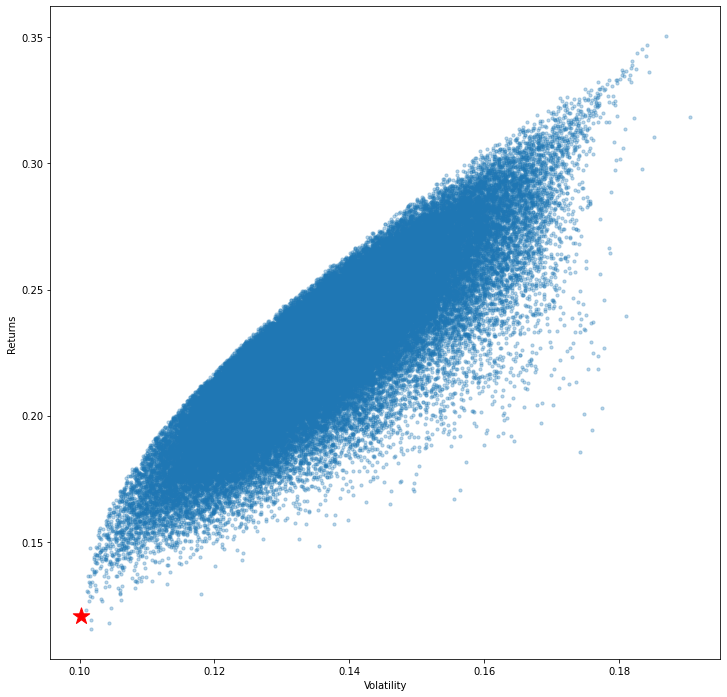

In [22]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[12,12])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=300)

## **Getting Weights for Highest Sharpe Ratio**

In [23]:
# Finding the optimal portfolio (i.e. Highest Sharpe Ratio)

# risk factor(risk-free rate)
rf = 0.0161  #1.61% Average return of Singapore Savings Bonds over 10 years https://www.mas.gov.sg/bonds-and-bills/Singapore-Savings-Bonds

optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns         0.305020
Volatility      0.159392
AAPL weight     0.455223
FB weight       0.003740
GOOGL weight    0.034736
MSFT weight     0.247620
PG weight       0.011075
SBUX weight     0.247606
Name: 72862, dtype: float64

In [24]:
assets

,Returns,Volatility
AAPL,0.394322,0.219800
FB,0.190584,0.223591
GOOGL,0.239043,0.193485
MSFT,0.338983,0.214279
PG,0.076113,0.126125
SBUX,0.128095,0.144379


In [25]:
#Sharpe Ratio of Optimally risky portfolio
sharpe_ratio_risky = optimal_risky_port[0] / optimal_risky_port[1]
sharpe_ratio_risky

1.913642304716593

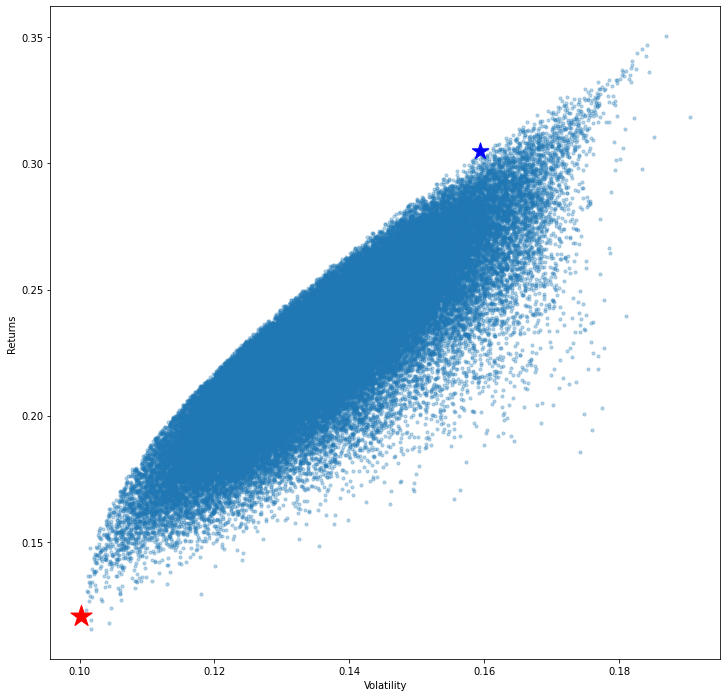

In [26]:
# Plotting optimal portfolio (Blue Star)
plt.subplots(figsize=(12, 12))
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='b', marker='*', s=300)